# Finite Markov Chains

In [1]:
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Diogo\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


In [2]:
ψ = (0.3, 0.7)           # probabilities over {0, 1}
cdf = np.cumsum(ψ)       # convert into cummulative distribution
qe.random.draw(cdf, 5)   # generate 5 independent draws from ψ

array([1, 1, 0, 1, 0])

In [3]:
def mc_sample_path(P, ψ_0=None, sample_size=1_000):

    # set up
    P = np.asarray(P)
    X = np.empty(sample_size, dtype=int)

    # Convert each row of P into a cdf
    n = len(P)
    P_dist = [np.cumsum(P[i, :]) for i in range(n)]

    # draw initial state, defaulting to 0
    if ψ_0 is not None:
        X_0 = qe.random.draw(np.cumsum(ψ_0))
    else:
        X_0 = 0

    # simulate
    X[0] = X_0
    for t in range(sample_size - 1):
        X[t+1] = qe.random.draw(P_dist[X[t]])

    return X

In [4]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

In [5]:
X = mc_sample_path(P, ψ_0=[0.1, 0.9], sample_size=100_000)
np.mean(X == 0)

0.24945

In [6]:
from quantecon import MarkovChain

mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1_000_000)
np.mean(X == 0)

0.251382

In [7]:
%time mc_sample_path(P, sample_size=1_000_000) # Our version

Wall time: 756 ms


array([0, 0, 0, ..., 1, 1, 1])

In [8]:
%time mc.simulate(ts_length=1_000_000) # qe version

Wall time: 36.9 ms


array([0, 0, 1, ..., 1, 1, 1])

In [9]:
mc = qe.MarkovChain(P, state_values=('unemployed', 'employed'))
mc.simulate(ts_length=4, init='employed')

array(['employed', 'employed', 'employed', 'employed'], dtype='<U10')

In [10]:
mc.simulate(ts_length=4, init='unemployed')

array(['unemployed', 'unemployed', 'employed', 'employed'], dtype='<U10')

In [11]:
mc.simulate(ts_length=4)  # Start at randomly chosen initial state

array(['employed', 'unemployed', 'employed', 'employed'], dtype='<U10')

In [12]:
mc.simulate_indices(ts_length=4)

array([1, 1, 1, 1])


<a id='mc-md'></a>

In [13]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

In [14]:
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

False

In [15]:
mc.communication_classes

[array(['poor'], dtype='<U6'), array(['middle', 'rich'], dtype='<U6')]

In [16]:
P = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]

mc = qe.MarkovChain(P)
mc.period

3

In [17]:
P = [[0.0, 1.0, 0.0, 0.0],
     [0.5, 0.0, 0.5, 0.0],
     [0.0, 0.5, 0.0, 0.5],
     [0.0, 0.0, 1.0, 0.0]]

mc = qe.MarkovChain(P)
mc.period

2

In [18]:
mc.is_aperiodic

False

In [19]:
P = np.array([[0.4, 0.6],
              [0.2, 0.8]])
ψ = (0.25, 0.75)
ψ @ P

array([0.25, 0.75])

In [20]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

mc = qe.MarkovChain(P)
mc.stationary_distributions  # Show all stationary distributions

array([[0.25, 0.75]])

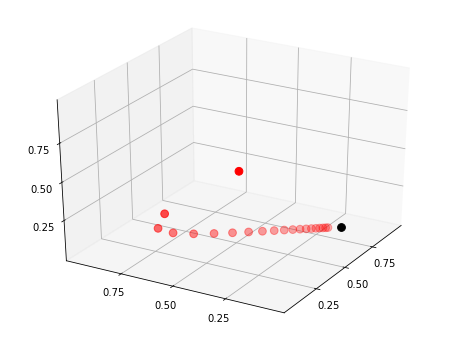

In [21]:
P = ((0.971, 0.029, 0.000),
     (0.145, 0.778, 0.077),
     (0.000, 0.508, 0.492))
P = np.array(P)

ψ = (0.0, 0.2, 0.8)        # Initial condition

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(ψ[0])
    y_vals.append(ψ[1])
    z_vals.append(ψ[2])
    ψ = ψ @ P

ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=60)

plt.show()

In [22]:
%%file web_graph_data.txt
a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;

Writing web_graph_data.txt


In [23]:
import re
re.findall('\w', 'x +++ y ****** z')  # \w matches alphanumerics

['x', 'y', 'z']

In [24]:
re.findall('\w', 'a ^^ b &&& $$ c')

['a', 'b', 'c']

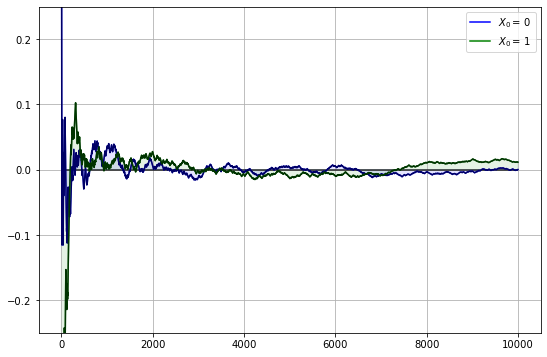

In [25]:
α = β = 0.1
N = 10000
p = β / (α + β)

P = ((1 - α,       α),               # Careful: P and p are distinct
     (    β,   1 - β))
P = np.array(P)
mc = MarkovChain(P)

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, N, lw=2, alpha=0.6)   # Horizonal line at zero

for x0, col in ((0, 'blue'), (1, 'green')):
    # Generate time series for worker that starts at x0
    X = mc.simulate(N, init=x0)
    # Compute fraction of time spent unemployed, for each n
    X_bar = (X == 0).cumsum() / (1 + np.arange(N, dtype=float))
    # Plot
    ax.fill_between(range(N), np.zeros(N), X_bar - p, color=col, alpha=0.1)
    ax.plot(X_bar - p, color=col, label=f'$X_0 = \, {x0} $')
    # Overlay in black--make lines clearer
    ax.plot(X_bar - p, 'k-', alpha=0.6)

ax.legend(loc='upper right')
plt.show()

In [26]:
"""
Return list of pages, ordered by rank
"""
import re
from operator import itemgetter

infile = 'web_graph_data.txt'
alphabet = 'abcdefghijklmnopqrstuvwxyz'

n = 14 # Total number of web pages (nodes)

# Create a matrix Q indicating existence of links
#  * Q[i, j] = 1 if there is a link from i to j
#  * Q[i, j] = 0 otherwise
Q = np.zeros((n, n), dtype=int)
f = open(infile, 'r')
edges = f.readlines()
f.close()
for edge in edges:
    from_node, to_node = re.findall('\w', edge)
    i, j = alphabet.index(from_node), alphabet.index(to_node)
    Q[i, j] = 1
# Create the corresponding Markov matrix P
P = np.empty((n, n))
for i in range(n):
    P[i, :] = Q[i, :] / Q[i, :].sum()
mc = MarkovChain(P)
# Compute the stationary distribution r
r = mc.stationary_distributions[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}
# Print solution, sorted from highest to lowest rank
print('Rankings\n ***')
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print(f'{name}: {rank:.4}')

Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.09106
b: 0.08326
e: 0.05312
i: 0.05312
c: 0.04834
h: 0.0456
l: 0.03202
d: 0.03056
f: 0.01164
a: 0.002911
